##### Library for in-built tensorflow datasets

In [1]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.2 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [7]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/home/mitu/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,

In [9]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [10]:
train_data, test_data = imdb['train'], imdb['test']

In [12]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

2024-12-12 13:08:28.468501: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
print(training_sentences[100])

b"I enjoyed this movie,and after watching it,it made me wonder just how many 'Caitlin Rose's' exist in the world.How many other girls have been subjected to this sort of sexual abuse,and torment by classmates and have been too frightened to open their mouth about it? Just how threatening and cruel can teenagers be towards one another,because as this film demonstrates,who's right is not foremost important,its who is popular,and feared which manipulates the minds of youths,and influences them to allow this sort of immorality to happen.Tiffani Amber Thiessen gives a powerful performance as the rape victim,and Brian Austin Green is convincing as the guy torn between the girl he thought he loved,and his best friend.This is the kind of film that doesn't get the exposure it deserves.Remarkable,and brilliant,too good to be just a film made for TV."


In [15]:
print(training_labels[100])

1


In [17]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [18]:
len(training_labels), len(testing_labels)

(25000, 25000)

In [19]:
type(training_labels)

list

In [20]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

##### Preprocessing

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer = Tokenizer(num_words=10000)

In [28]:
tokenizer.fit_on_texts(training_sentences)

In [29]:
word_index = tokenizer.word_index

In [32]:
word_index;

In [37]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=500, truncating = 'post', padding='pre')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=500, 
                               truncating='post', padding='pre')

In [38]:
padded.shape

(25000, 500)

##### Import the libraries

In [40]:
from keras.layers import Dense, Embedding, SimpleRNN, Bidirectional, LSTM, GRU

In [41]:
from keras.models import Sequential

##### Build simple RNN Model

In [49]:
model_rnn = Sequential([
    Embedding(10000, 50, input_length=50),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/mitu/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

In [52]:
history = model_rnn.fit(padded, training_labels, epochs=10,
                       validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.5849 - loss: 0.6485 - val_accuracy: 0.7694 - val_loss: 0.4936
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.8376 - loss: 0.3809 - val_accuracy: 0.7402 - val_loss: 0.5559
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.9015 - loss: 0.2420 - val_accuracy: 0.8181 - val_loss: 0.4639
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.9575 - loss: 0.1246 - val_accuracy: 0.8185 - val_loss: 0.5179
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.9740 - loss: 0.0805 - val_accuracy: 0.7774 - val_loss: 0.7425
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.9841 - loss: 0.0460 - val_accuracy: 0.7784 - val_loss: 0.8852
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.9941 - loss: 0.0201 - val_accuracy: 0.6527 - val_loss: 1.2656
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.9739 - loss: 0.0683 - 

In [54]:
import matplotlib.pyplot as plt

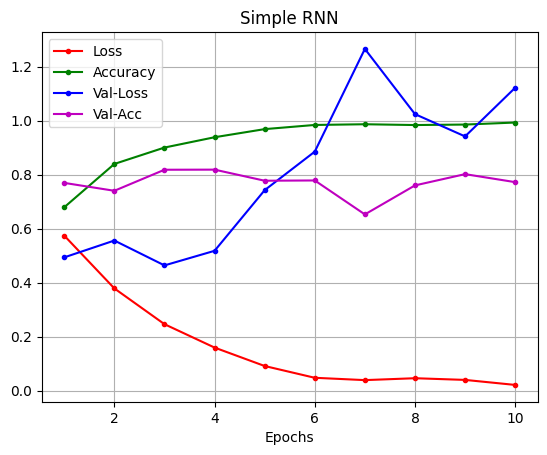

In [56]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], 
         color = 'r', label = 'Loss', marker='.')
plt.plot(range(1,11), history.history['accuracy'], 
         color = 'g', label = 'Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], 
         color = 'b', label = 'Val-Loss',marker='.')
plt.plot(range(1,11), history.history['val_accuracy'], 
         color = 'm', label = 'Val-Acc',marker='.')
plt.legend(loc='upper left')

##### Build LSTM Model

In [61]:
model_lstm = Sequential([
    Embedding(10000, 50, input_length=50),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [63]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

In [65]:
history_lstm = model_lstm.fit(padded, training_labels, epochs=10,
                       validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 185ms/step - accuracy: 0.8583 - loss: 0.3527 - val_accuracy: 0.8391 - val_loss: 0.3664
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 198ms/step - accuracy: 0.9124 - loss: 0.2334 - val_accuracy: 0.8573 - val_loss: 0.3577
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 197ms/step - accuracy: 0.9435 - loss: 0.1591 - val_accuracy: 0.8716 - val_loss: 0.3268
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 209ms/step - accuracy: 0.9552 - loss: 0.1219 - val_accuracy: 0.8660 - val_loss: 0.3809
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 208ms/step - accuracy: 0.9614 - loss: 0.1113 - val_accuracy: 0.8565 - val_loss: 0.4417
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 200ms/step - accuracy: 0.9759 - loss: 0.0727 - val_accuracy: 0.8579 - val_loss: 0.4746
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 199ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.8592 - val_loss: 0.6036
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.9877 -

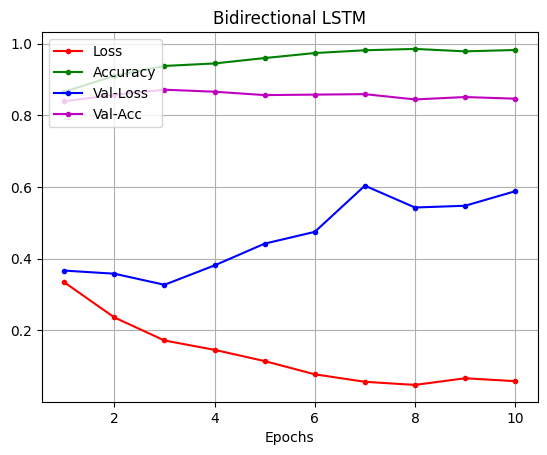

In [66]:
plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_lstm.history['loss'], color = 'r', label = 'Loss', marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color = 'g', label = 'Accuracy',marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color = 'b', label = 'Val-Loss',marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = 'm', label = 'Val-Acc',marker='.')
plt.legend(loc='upper left')

##### Build the GRU model

In [68]:
model_gru = Sequential([
    Embedding(10000, 50, input_length=50),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [69]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

In [70]:
history_gru = model_gru.fit(padded, training_labels, epochs=10,
                       validation_data=(testing_padded, testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 209ms/step - accuracy: 0.6611 - loss: 0.5775 - val_accuracy: 0.8507 - val_loss: 0.3513
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.8865 - loss: 0.2875 - val_accuracy: 0.8450 - val_loss: 0.3711
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 264ms/step - accuracy: 0.9314 - loss: 0.1844 - val_accuracy: 0.8710 - val_loss: 0.3173
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 254ms/step - accuracy: 0.9604 - loss: 0.1172 - val_accuracy: 0.8773 - val_loss: 0.3364
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 240ms/step - accuracy: 0.9800 - loss: 0.0689 - val_accuracy: 0.8721 - val_loss: 0.4049
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - accuracy: 0.9891 - loss: 0.0391 - val_accuracy: 0.8691 - val_loss: 0.5060
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 242ms/step - accuracy: 0.9951 - loss: 0.0193 - val_accuracy: 0.8573 - val_loss: 0.6022
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 240ms/step - accuracy: 0.9962 -

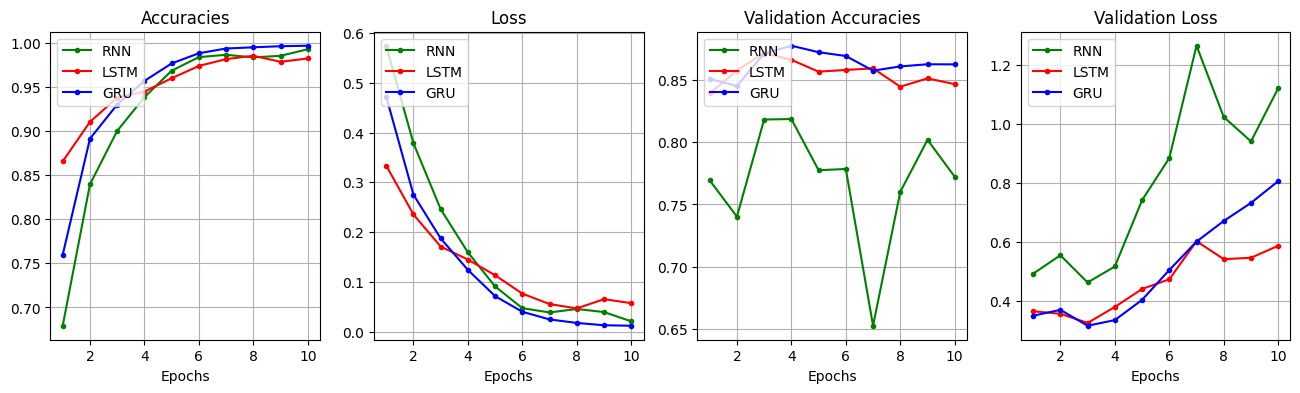

In [73]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color = 'g', label = 'RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color = 'r', label = 'LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['accuracy'], color = 'b', label = 'GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color = 'g', label = 'RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['loss'], color = 'r', label = 'LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['loss'], color = 'b', label = 'GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,3)
plt.title('Validation Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_accuracy'], color = 'g', label = 'RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = 'r', label = 'LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color = 'b', label = 'GRU',marker='.')
plt.legend(loc='upper left')

plt.subplot(1,4,4)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_loss'], color = 'g', label = 'RNN',marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color = 'r', label = 'LSTM',marker='.')
plt.plot(range(1,11), history_gru.history['val_loss'], color = 'b', label = 'GRU',marker='.')
plt.legend(loc='upper left')

In [74]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time.'
new2 = 'A must watch movie. I loved to watch it. It was just amazing!'

In [76]:
def predict(model, text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=500, truncating = 'post')
    
    result = model.predict(pad, verbose = False)
    percent_pos = result[0,0]
    if round(percent_pos) == 0:
      return((1-percent_pos), 'NEGATIVE')
    else:
      return(percent_pos, 'POSITIVE')

In [78]:
predict(model_rnn, new1), predict(model_rnn, new2)

((0.5015756, 'POSITIVE'), (0.50056386, 'POSITIVE'))

In [ ]:
predict(model_rnn, new1), predict(model_rnn, new2)